In [27]:
import sys
sys.path.append("../")

from mxnet import autograd, nd
import d2l
import random


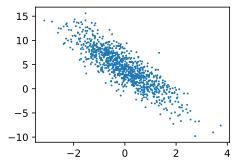

In [28]:
'''
    1. Generating Data Sets
'''

def synthetic_data(w, b, num_examples):
    # y = Xw + b + noise
    X = nd.random.normal(scale=1, shape=(num_examples, len(w)))
    y = nd.dot(X, w) + b
    y += nd.random.normal(scale= 0.1, shape=y.shape)
    return X, y

true_w = nd.array([2, -3.4])
true_b = 4.2

features, labels = synthetic_data(true_w, true_b, num_examples= 1000)


d2l.set_figsize((3.5, 2.5))
d2l.plt.scatter(features[:, 1].asnumpy(), labels.asnumpy(), 1)

In [29]:
'''
    2. Reading data
'''

# mini batch
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    
    random.shuffle(indices)
    
    for i in range(0, num_examples, batch_size):
        j = nd.array(indices[i : min(i +  batch_size, num_examples)])
        yield features.take(j), labels.take(j)
        
batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break

'''
    3. Initialize Model Parameters
'''
# w = nd.zeros(shape=(2 ,1))
w = nd.random.normal(scale= 0.01, shape= (2, 1))
b = nd.zeros(shape=(1, ))

w.attach_grad()
b.attach_grad()

'''
    4. Define the Model
'''
def linereg(X, w, b):
    return nd.dot(X, w) + b

def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape))**2 / 2

# Stochastic Gradient Descent Optimization Algorithm
def sgd(params, lr, batch_size):
    for param in params:
        param[:] = param - lr * param.grad /  batch_size
                    




[[-0.27017105 -0.02118417]
 [-0.47022468  0.22002852]
 [ 2.8714633  -0.60171384]
 [-0.6840678  -0.01804611]
 [-1.5646906  -1.1538042 ]
 [-0.7058319  -0.20885399]
 [ 0.7009394   1.4762367 ]
 [-0.81428576 -0.31951544]
 [ 1.3633896  -1.1632172 ]
 [-0.22070721 -1.2949386 ]]
<NDArray 10x2 @cpu(0)> 
[ 3.7143986  2.6108108 12.183846   2.920727   5.038552   3.4793267
  0.569625   3.895349  10.693785   8.04658  ]
<NDArray 10 @cpu(0)>


In [30]:
'''
    5. Training
'''
lr = 0.03
num_epochs = 3
net = linereg
loss =  squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        with autograd.record():
            l = loss(net(X, w, b), y)
        l.backward()
        sgd([w, b], lr, batch_size)
    train_l =  loss(net(X, w, b), labels)
    print("epoch %d, loss %f" % (epoch + 1, train_l.mean().asnumpy()))
    
print("Error in estimating w", true_w -  w.reshape(true_w.shape))
print("Error in estimating b", true_b -  b)

epoch 1, loss 17.243923
epoch 2, loss 15.732635
epoch 3, loss 13.765536
Error in estimating w 
[ 0.00566328 -0.00227165]
<NDArray 2 @cpu(0)>
Error in estimating b 
[-0.00106335]
<NDArray 1 @cpu(0)>
